![No Free Lunch](https://github.com/parth1993/g4h/blob/master/no-free-lunch-theorems-analytics-india-magazine.jpg?raw=1)

# Natural Language Processing for Text Classification with NLTK and Scikit-learn

### Presented by Parth Sharma!

In this workshop, Text Classification - Walk Through in Python, we will learn about one of the fundamental tasks in Natural Language Processing i.e. **Text Classification**. This will include the basics of feature engineering(tokenizing, stop words, stemming, lemmatizing) and ; furthermore, we will dive into machine learning and text classification using a bunch of differnt techniques and a dataset of positive and negative movie reviews.

In this tutorial, we will expand on this foundation and explore different ways to improve our text classification results. We will cover and use:

* Regular Expressions
* Feature Engineering
* Multiple scikit-learn Classifiers

## What is Text Classification?

* Refers to process of assigning tags/categories to unstructured text according to it's content 
* a.k.a Text Categorization or Text Tagging

## If it's just tagging the text, then why do we need Text Classification?

Text classifiers can be used to organize, structure, and categorize pretty much anything. For example, emails can be organized by spam/non-spam, news articles can be organized by topics, support tickets can be organized by urgency, chat conversations can be organized by language, brand mentions can be organized by sentiment, and so on.

Tagging raw text would require a lot of resources(workforce and time). Text Classification using NLP resolves these issues and overcome the disadvantages of manual tagging.

## Types of Text Classification Systems:

* Rule Based Systems
* **Machine Learning Systems**
* Hybrid Systems (Both ML and Rules)

### 1. Import Necessary Libraries
To ensure the necessary libraries are installed correctly and up-to-date, print the version numbers for each library. This will also improve the reproducibility of our project.

In [13]:
import sys
try:
    import nltk
except:
    !pip install nltk -y
    import nltk
    nltk.download('all')
try:
    import sklearn
except:
    !pip install sklearn -y
    import sklearn
try:
    import pandas as pd
except:
    !pip install pandas -y
    import pandas as pd
try:
    import numpy as np
except:
    !pip install numpy -y
    import numpy as np
try:
    import matplotlib.pyplot as plt
except:
    !pip install matplotlib -y
    import matplotlib.pyplot as plt
    

print('Python: {}'.format(sys.version))
print('NLTK: {}'.format(nltk.__version__))
print('Scikit-learn: {}'.format(sklearn.__version__))
print('Pandas: {}'.format(pd.__version__))
print('Numpy: {}'.format(np.__version__))

Python: 3.6.9 (default, Nov  7 2019, 10:44:02) 
[GCC 8.3.0]
NLTK: 3.2.5
Scikit-learn: 0.21.3
Pandas: 0.25.3
Numpy: 1.17.4


## 2. Load the Dataset
Now that we have ensured that our libraries are installed correctly, let's load the data set as a Pandas DataFrame. Furthermore, let's extract some useful information such as the column information and class distributions.

The data set we will be using comes from the Kaggle datasets. It contains over 20001 tweets labeled messages that have been collected for detection of cyber trolls research. It can be downloaded from the following URL:

https://www.kaggle.com/dataturks/dataset-for-detection-of-cybertrolls/version/1#

In [0]:
df = pd.read_json('Dataset for Detection of Cyber-Trolls.json', lines=True)
df = df[['content', 'annotation']]

In [15]:
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20001 entries, 0 to 20000
Data columns (total 2 columns):
content       20001 non-null object
annotation    20001 non-null object
dtypes: object(2)
memory usage: 312.6+ KB
None
                                             content                     annotation
0                             Get fucking real dude.  {'notes': '', 'label': ['1']}
1   She is as dirty as they come  and that crook ...  {'notes': '', 'label': ['1']}
2   why did you fuck it up. I could do it all day...  {'notes': '', 'label': ['1']}
3   Dude they dont finish enclosing the fucking s...  {'notes': '', 'label': ['1']}
4   WTF are you talking about Men? No men thats n...  {'notes': '', 'label': ['1']}


In [16]:
#This code will check for any nan values in the dataframe we just loaded
df.isnull().values.any()

False

#### Class distribution

In [17]:
# Class distribution
target = df['annotation'].apply(lambda x: int(x['label'][0]))
target.value_counts()

0    12179
1     7822
Name: annotation, dtype: int64

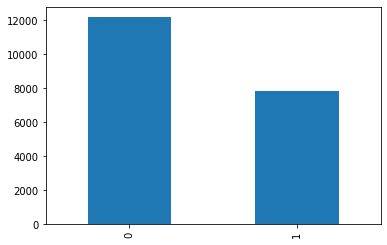

In [18]:
pd.value_counts(target).plot(kind="bar")

## 3. Preprocess the Data

Preprocessing the data is an essential step in natural language process. In the following cells, we will convert our class labels to binary values using the LabelEncoder from sklearn, replace email addresses, URLs, phone numbers, and other symbols by using regular expressions, remove stop words, and extract word stems.

In [19]:
from sklearn.preprocessing import LabelEncoder

# convert class labels to binary values, 0 = Not a troll and 1 = it's a troll!
encoder = LabelEncoder()
Y = encoder.fit_transform(target)

print(Y[:10])

[1 1 1 1 1 1 1 1 1 1]


In [20]:
# store the tweet data
tweets = df['content']
print(tweets[:10])

0                               Get fucking real dude.
1     She is as dirty as they come  and that crook ...
2     why did you fuck it up. I could do it all day...
3     Dude they dont finish enclosing the fucking s...
4     WTF are you talking about Men? No men thats n...
5    Ill save you the trouble sister. Here comes a ...
6     Im dead serious.Real athletes never cheat don...
7    ...go absolutely insane.hate to be the bearer ...
8    Lmao  im watching the same thing ahaha. The ga...
9    LOL  no he said  What do you call a jail cell ...
Name: content, dtype: object


In [0]:
# use regular expressions to replace email addresses, URLs, phone numbers, other numbers

# Replace email addresses with 'email'
processed = tweets.str.replace(r'^.+@[^\.].*\.[a-z]{2,}$',
                                 'emailaddress')

# Replace URLs with 'webaddress'
processed = processed.str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$',
                                  'webaddress')

# Replace money symbols with 'moneysymb' (£ can by typed with ALT key + 156)
processed = processed.str.replace(r'£|\$', 'moneysymb')
    
# Replace 10 digit phone numbers (formats include paranthesis, spaces, no spaces, dashes) with 'phonenumber'
processed = processed.str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$',
                                  'phonenumbr')
    
# Replace numbers with 'numbr'
processed = processed.str.replace(r'\d+(\.\d+)?', 'numbr')

In [0]:
# Remove punctuation
processed = processed.str.replace(r'[^\w\d\s]', ' ')

# Replace whitespace between terms with a single space
processed = processed.str.replace(r'\s+', ' ')

# Remove leading and trailing whitespace
processed = processed.str.replace(r'^\s+|\s+?$', '')

In [23]:
# Change words to lower case
processed = processed.str.lower()
print(processed)

0                                    get fucking real dude
1        she is as dirty as they come and that crook re...
2        why did you fuck it up i could do it all day t...
3        dude they dont finish enclosing the fucking sh...
4        wtf are you talking about men no men thats not...
                               ...                        
19996    i dont but what is complaining about it going ...
19997    bahah yeah i m totally just gonna get pissed a...
19998             hahahahaha im evil mwahahahahahahahahaha
19999                   what s something unique about ohio
20000                 who is the biggest gossiper you know
Name: content, Length: 20001, dtype: object


In [29]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords #are, is, the --> those words which occurs too frequently and are of no significance.

# remove stop words from tweets

stop_words = set(stopwords.words('english'))
processed = processed.apply(lambda x: ' '.join(
    term for term in x.split() if term not in stop_words))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [0]:
# Remove word stems using a Porter stemmer  #steam words--> running-->run from run we got running; so run is the steam word for running
ps = nltk.PorterStemmer()

processed = processed.apply(lambda x: ' '.join(
    ps.stem(term) for term in x.split()))

## 4. Generating Features
Feature engineering is the process of using domain knowledge of the data to create features for machine learning algorithms. In this project, the words in each text message will be our features. For this purpose, it will be necessary to tokenize each word and convert them into vectorized format using TF-IDF.

In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer


tfidf = TfidfVectorizer(ngram_range=(1,2), min_df=0.01)
X = tfidf.fit_transform(processed)

print(tfidf.get_feature_names())

['alway', 'ass', 'back', 'bad', 'better', 'big', 'bitch', 'call', 'com', 'come', 'could', 'damn', 'day', 'dick', 'dont', 'dude', 'even', 'ever', 'fat', 'feel', 'friend', 'fuck', 'gay', 'get', 'girl', 'give', 'go', 'gonna', 'good', 'got', 'guy', 'haha', 'hate', 'hope', 'http', 'im', 'kick', 'kick ass', 'know', 'last', 'let', 'life', 'like', 'lmao', 'lol', 'look', 'love', 'make', 'man', 'mayb', 'mean', 'much', 'name', 'need', 'nerd', 'never', 'new', 'night', 'numbr', 'oh', 'one', 'peopl', 'person', 'pretti', 'realli', 'right', 'say', 'see', 'shit', 'show', 'someon', 'someth', 'sorri', 'still', 'suck', 'sure', 'take', 'talk', 'tell', 'thank', 'that', 'thing', 'think', 'though', 'time', 'tri', 'twitter', 'ur', 'use', 'want', 'watch', 'way', 'well', 'work', 'would', 'ye', 'yeah', 'year']


In [34]:
len(tfidf.get_feature_names())

98

In [35]:
print(X.shape)

(20001, 98)


In [0]:
# we can split the featuresets into training and testing datasets using sklearn
from sklearn import model_selection

# split the data into training and testing datasets
training, testing, y_train, y_test = model_selection.train_test_split(X, Y, stratify=Y, test_size = 0.25, random_state=0)

## 5. Model Development

In [37]:
from sklearn.ensemble import VotingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Define models to train
names = ["Logistic Regression", "SGD Classifier",
         "Naive Bayes", "SVM Linear"]

classifiers = [
    LogisticRegression(),
    SGDClassifier(max_iter = 100),
    MultinomialNB(),
    SVC(kernel = 'linear')
]
clf1 = LogisticRegression()
clf2 = RandomForestClassifier()
clf3 = MultinomialNB()
clf4 = SVC(kernel = 'linear')
models = zip(names, classifiers)

for name, model in models:
    nlp_model = model
    nlp_model.fit(training, y_train)
    accuracy = nlp_model.score(testing, y_test)*100
    print("{} Accuracy: {}".format(name, accuracy))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Logistic Regression Accuracy: 68.68626274745051
SGD Classifier Accuracy: 68.0863827234553
Naive Bayes Accuracy: 66.62667466506699
SVM Linear Accuracy: 67.92641471705659


In [0]:
# Ensemble model using different classifiers

ensemble_model = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('nb', clf3),
                                              ('svm', clf4)], voting ='hard')


In [39]:
ensemble_model.fit(training, y_train)
accuracy = ensemble_model.score(testing, y_test)*100
print("{} Accuracy: {}".format('Ensemble model', accuracy))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Ensemble model Accuracy: 69.70605878824236


In [0]:
prediction = ensemble_model.predict(testing)

In [41]:
print(classification_report(y_test, prediction))

pd.DataFrame(
    confusion_matrix(y_test, prediction),
    index = [['actual', 'actual'], ['Troll', 'Non-Troll']],
    columns = [['predicted', 'predicted'], ['Troll', 'Non-Troll']])

              precision    recall  f1-score   support

           0       0.70      0.88      0.78      3045
           1       0.69      0.41      0.51      1956

    accuracy                           0.70      5001
   macro avg       0.69      0.65      0.65      5001
weighted avg       0.70      0.70      0.68      5001



predicted          
                     Troll Non-Troll
actual Troll          2682       363
       Non-Troll      1152       804